In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [ ]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
if len(physical_devices):
  tf.config.experimental.set_memory_growth(physical_devices[0], True)

# Data preparation
The images included in the data/cats-and-dogs directory are a random subset of the full cat and dog data set from the following Kaggle competition: https://www.kaggle.com/c/dogs-vs-cats/data


In [ ]:
# Organize data into train, valid, test dirs
import os
os.chdir('/Users/yjiang/Downloads/data/dogs-vs-cats/')

if os.path.exists('train/dog'):
    shutil.rmtree('train/dog')
if os.path.exists('train/cat'):
    shutil.rmtree('train/cat')
if os.path.exists('valid'):
    shutil.rmtree('valid')
if os.path.exists('test'):
    shutil.rmtree('test')

if not os.path.exists('train/dog'):
    print('construct train/val/test data folders')
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')
    
    print('copy data...')
    for c in random.sample(glob.glob('train/cat*'), 500):
      shutil.move(c,'train/cat')
    for c in random.sample(glob.glob('train/dog*'), 500):
      shutil.move(c,'train/dog')
    for c in random.sample(glob.glob('train/cat*'), 100):
      shutil.move(c,'valid/cat')
    for c in random.sample(glob.glob('train/dog*'), 100):
      shutil.move(c,'valid/dog')
    for c in random.sample(glob.glob('train/cat*'), 100):
      shutil.move(c,'test/cat')
    for c in random.sample(glob.glob('train/dog*'), 100):
      shutil.move(c,'test/dog')

    os.chdir('../../')
print('finished')

In [2]:
path = '/Users/yjiang/Downloads/data/dogs-vs-cats'
train_path = os.path.join(path, 'train')
valid_path = os.path.join(path, 'valid')
test_path = os.path.join(path, 'test')

train_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input
).flow_from_directory(directory=train_path, target_size=(224, 224), classes=['cat', 'dog'], batch_size=10)

valid_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input
).flow_from_directory(directory=valid_path, target_size=(224, 224), classes=['cat', 'dog'], batch_size=10)

test_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input
).flow_from_directory(directory=test_path, target_size=(224, 224), classes=['cat', 'dog'], batch_size=10)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

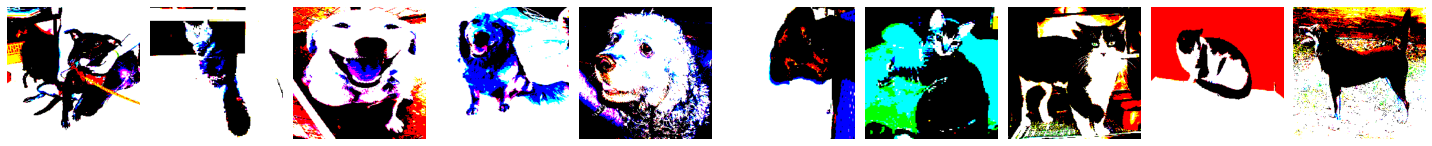

[[0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [3]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 10, figsize=(20, 20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

imgs, labels = next(train_batches)
plotImages(imgs)
print(labels)

In [8]:
model = Sequential([
  Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=(2, 2), strides=2),
  Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
  MaxPool2D(pool_size=(2, 2), strides=2),
  Flatten(),
  Dense(units=2, activation='softmax')
])
model.summary()

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x=train_batches, validation_data=valid_batches, epochs=8, verbose=2)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 200704)            0         
                                                                 
 dense_3 (Dense)             (None, 2)                

2022-05-29 21:19:57.178492: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-29 21:20:02.328594: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 - 6s - loss: 12.1883 - accuracy: 0.6040 - val_loss: 10.2201 - val_accuracy: 0.5700 - 6s/epoch - 57ms/step
Epoch 2/8
100/100 - 5s - loss: 3.4285 - accuracy: 0.7350 - val_loss: 3.1562 - val_accuracy: 0.6250 - 5s/epoch - 52ms/step
Epoch 3/8
100/100 - 5s - loss: 0.4918 - accuracy: 0.9010 - val_loss: 3.0788 - val_accuracy: 0.6200 - 5s/epoch - 53ms/step
Epoch 4/8
100/100 - 5s - loss: 0.2174 - accuracy: 0.9490 - val_loss: 2.5944 - val_accuracy: 0.6050 - 5s/epoch - 52ms/step
Epoch 5/8
100/100 - 5s - loss: 0.0792 - accuracy: 0.9740 - val_loss: 2.8772 - val_accuracy: 0.6050 - 5s/epoch - 52ms/step
Epoch 6/8
100/100 - 5s - loss: 0.0444 - accuracy: 0.9850 - val_loss: 3.4361 - val_accuracy: 0.6000 - 5s/epoch - 52ms/step
Epoch 7/8
100/100 - 5s - loss: 0.0154 - accuracy: 0.9950 - val_loss: 2.7723 - val_accuracy: 0.6300 - 5s/epoch - 52ms/step
Epoch 8/8
100/100 - 5s - loss: 7.5965e-04 - accuracy: 1.0000 - val_loss: 2.7282 - val_accuracy: 0.6500 - 5s/epoch - 53ms/step


# Predict

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

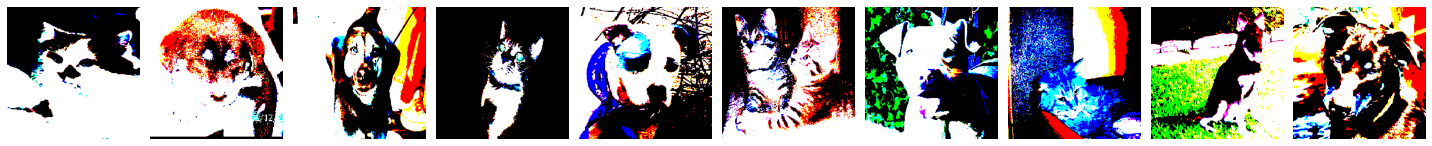

[[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [9]:
imgs, labels = next(test_batches)
plotImages(imgs)
print(labels)
test_batches.classes

In [10]:
predictions = model.predict(x=test_batches, verbose=0)

2022-05-29 21:21:11.829488: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Confusion matrix, without normalization
[[56 44]
 [45 55]]


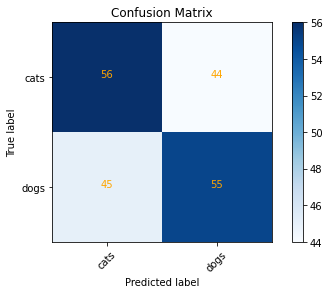

In [16]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
  else:
    print('Confusion matrix, without normalization')
  print(cm)

  thresh = cm.max() / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment='center', color='orange' if cm[i, j] > thresh else 'black')
  
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))
cm_plot_labels = ['cats', 'dogs']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

# Build Fine-tuned VGG16 model

In [17]:
vgg16_model = tf.keras.applications.vgg16.VGG16()
vgg16_model.summary()

553467096/553467096 [==============================] - 127s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                          

In [19]:
model_vgg16 = Sequential()
for layer in vgg16_model.layers[:-1]:
  model_vgg16.add(layer)
for layer in model.layers:
  layer.trainable = False
model_vgg16.add(Dense(units=2, activation='softmax'))
model_vgg16.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

# Train the fine-tuned VGG16 model

In [35]:
model_vgg16.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model_vgg16.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)

Epoch 1/10


2022-05-29 22:25:04.685564: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-29 22:26:24.813142: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 - 84s - loss: 0.5536 - accuracy: 0.7280 - val_loss: 0.7130 - val_accuracy: 0.6400 - 84s/epoch - 845ms/step
Epoch 2/10
100/100 - 83s - loss: 0.5115 - accuracy: 0.7380 - val_loss: 0.6572 - val_accuracy: 0.6300 - 83s/epoch - 834ms/step
Epoch 3/10
100/100 - 83s - loss: 0.4841 - accuracy: 0.7660 - val_loss: 0.6714 - val_accuracy: 0.6550 - 83s/epoch - 832ms/step
Epoch 4/10
100/100 - 83s - loss: 0.4353 - accuracy: 0.7980 - val_loss: 0.7487 - val_accuracy: 0.6450 - 83s/epoch - 833ms/step
Epoch 5/10
100/100 - 83s - loss: 0.4054 - accuracy: 0.8170 - val_loss: 0.7570 - val_accuracy: 0.6750 - 83s/epoch - 833ms/step
Epoch 6/10
100/100 - 83s - loss: 0.3625 - accuracy: 0.8400 - val_loss: 0.8396 - val_accuracy: 0.6500 - 83s/epoch - 832ms/step
Epoch 7/10
100/100 - 83s - loss: 0.3054 - accuracy: 0.8780 - val_loss: 0.9093 - val_accuracy: 0.6550 - 83s/epoch - 833ms/step
Epoch 8/10
100/100 - 84s - loss: 0.2528 - accuracy: 0.9010 - val_loss: 1.1707 - val_accuracy: 0.6650 - 84s/epoch - 837ms/step
Epo

# Predict with the fine-tuned VGG16 model

Confusion matrix, without normalization
[[57 43]
 [54 46]]


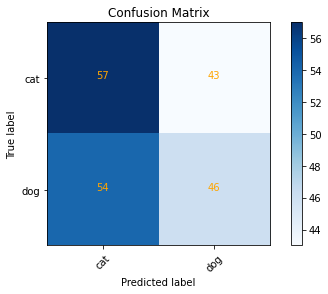

In [37]:
predictions = model_vgg16.predict(x=test_batches, verbose=0)
test_batches.class_indices
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))
cm_plot_labels = ['cat', 'dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')